### DOMAIN: Medical•CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due  to  confidentiality  the  patient’s  details  and  the  conditions  are  masked  by  the  client  by  providing  different  datasets  to  the  AI  team  for developing a AIML model which can predict the condition of the patient depending on the received test results.•DATA  DESCRIPTION: The  data  consists  of  biomechanics  features  of  the  patients  according  to  their  current  conditions.  Each  patient  is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

### 1 .Data UnderStanding

In [276]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [277]:
df_normal=pd.read_csv('Normal.csv')

In [278]:
df_typeh=pd.read_csv('Type_H.csv')

In [279]:
df_types=pd.read_csv('Type_S.csv')

### Shape and column of all three dataframes

In [280]:
df_normal.shape

(100, 7)

#### we have 7 columns and 100 rows in normal dataset

In [281]:
df_typeh.shape

(60, 7)

#### we have 7 columns and 60 rows in type_H dataset

In [282]:
df_types.shape

(150, 7)

#### we have 7 columns and 150 rows in type_S dataset

In [283]:
df_normal.info

<bound method DataFrame.info of     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0     38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1     54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2     44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3     48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4     45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal
..          ...        ...        ...        ...         ...       ...     ...
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  Normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  Normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  Normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  Normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  Normal

[100 rows x 7 colum

In [284]:
df_typeh.info

<bound method DataFrame.info of     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
0     63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1     39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2     68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3     69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4     49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
5     40.250200  13.921907  25.124950  26.328293  130.327871   2.230652   
6     53.432928  15.864336  37.165934  37.568592  120.567523   5.988551   
7     45.366754  10.755611  29.038349  34.611142  117.270067 -10.675871   
8     43.790190  13.533753  42.690814  30.256437  125.002893  13.289018   
9     36.686353   5.010884  41.948751  31.675469   84.241415   0.664437   
10    49.706610  13.040974  31.334500  36.665635  108.648265  -7.825986   
11    31.232387  17.715819  15.500000  13.516568  120.055399   0.499

In [285]:
df_types.info

<bound method DataFrame.info of      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      74.377678  32.053104  78.772013  42.324573  143.560690   56.125906   
1      89.680567  32.704435  83.130732  56.976132  129.955476   92.027277   
2      44.529051   9.433234  52.000000  35.095817  134.711772   29.106575   
3      77.690577  21.380645  64.429442  56.309932  114.818751   26.931841   
4      76.147212  21.936186  82.961502  54.211027  123.932010   10.431972   
..           ...        ...        ...        ...         ...         ...   
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Type_S  
1    Type_S  
2

#### Compare Column names of all the 3 DataFrames and clearly write observations. 

#### Observation : As we can see all the datasets are having same column names 

#### D. Print DataTypes of all the 3 DataFrames

In [286]:
df_normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [287]:
df_typeh.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [288]:
df_types.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

#### Observation: All the columns are of float data type except class column 

#####  Class is object we need to change the datatype of this column

#### E Observe and share variation in ‘Class’ feature of all the 3 DaraFrames.

In [289]:
df_normal['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [290]:
df_typeh['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [291]:
df_types['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

#### Observation : we can see different values of classes are present in data frame as Normal,Nrmal,Type_H,type_h,Type_S and type_s

### 2. Data Preparation and Exploration: [5 Marks]

#### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [292]:
df_normal.loc[df_normal['Class']=='Nrmal','Class']='Normal'
df_typeh.loc[df_typeh['Class']=='type_h','Class']='Type_H'
df_types.loc[df_types['Class']=='tp_s','Class']='Type_S'

#### B. Combine all the 3 DataFrames to form a single DataFrame 

In [293]:
df_merge = pd.concat([df_normal,df_typeh,df_types],ignore_index=True)


#### C. Print 5 random samples of this DataFrame [1 Marks]

In [294]:
df_merge.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [295]:
df_merge.shape

(310, 7)

#### Expected number of rows is matching to 310 and columns to 7

In [296]:
df_merge['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

#### Now we have 3 discrete class in our dataset

#### D. Print Feature-wise percentage of Null values. [1 Mark]

In [297]:
df_merge.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

#### we can see there are no null values present in data set which means there are 0 percent of Null values

#### E. Check 5-point summary of the new DataFrame.

In [298]:
df_merge.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Above is the 5 point summary of the new dataframe where we can see mean , median , mode , 25%, 75% figures for each of the class

### 3. Data Analysis: [10 Marks]

#### A. Visualize a heatmap to understand correlation between all features [2 Marks]

In [299]:
df_merge.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


### from the correlation matrix it can be seen that there is good correlation between P_incidence and S_Slope which is around 
0.81 

<AxesSubplot:>

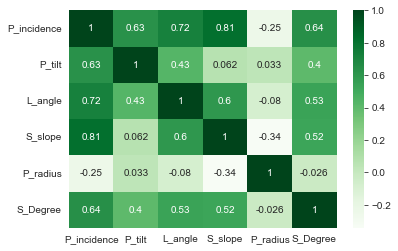

In [300]:
corr = df_merge.corr()
sns.heatmap(corr,cmap="Greens",annot=True)

#### B. Share insights on correlation.

#### A. Features having stronger correlation with correlation value.

#### P_incidence and S_slope has higher correlation feature with 0.81

#### P_incidence abd P_radius has lower correlation wirh value -0.34

#### C. Visualize a pairplot with 3 classes distinguished by colors and share insights

In [301]:
df_merge.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

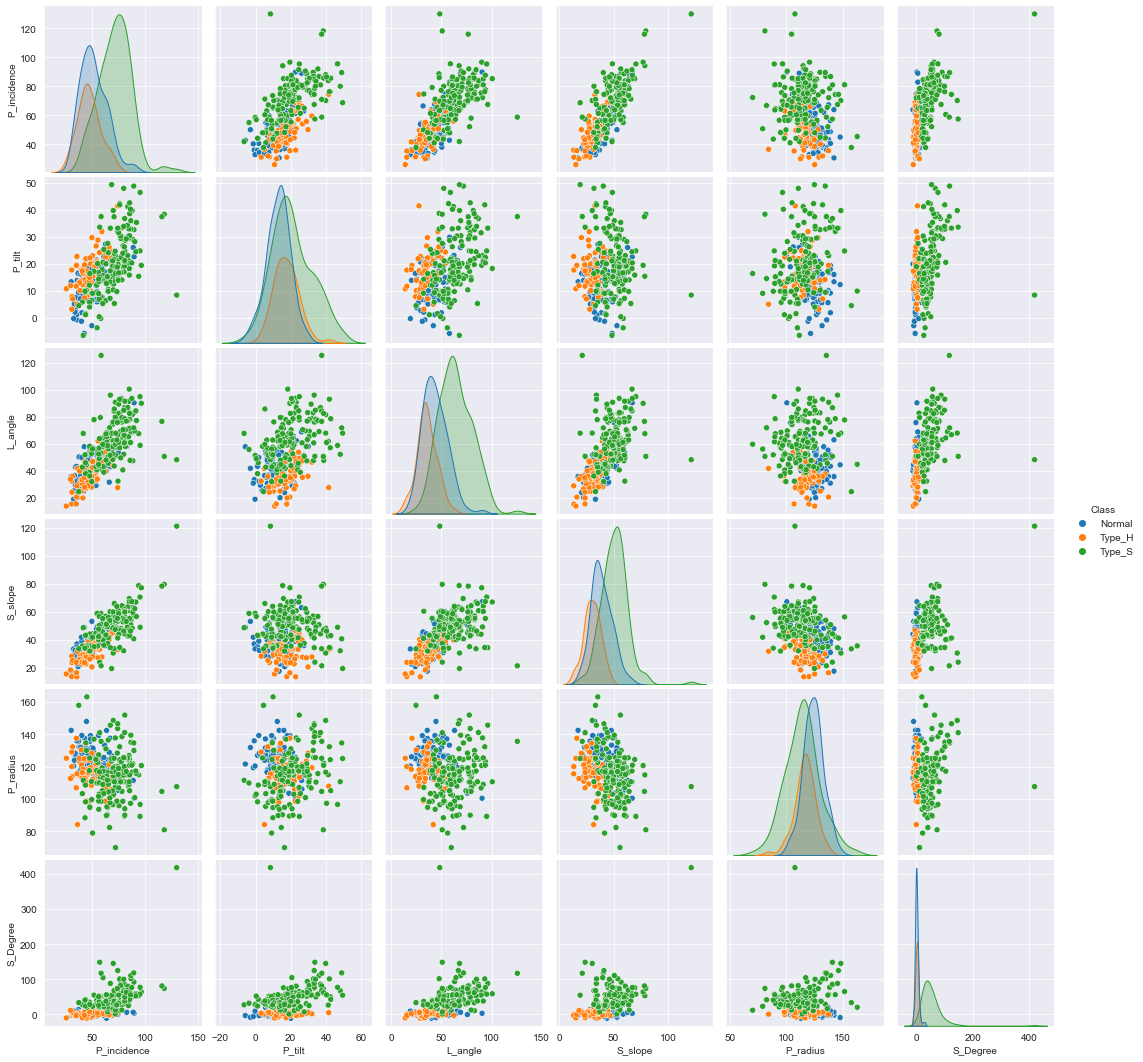

In [302]:
sns.pairplot(df_merge, hue='Class')

#### From the pair plot we can clearly see type_S class is more then type_h and normal class

#### P_incidence values for type_S are higher then type_h and normal class

#### Normal class has higher values compared to Type_H

#### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

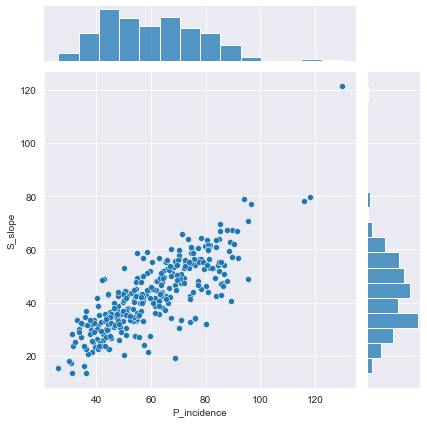

In [303]:
sns.jointplot(x = "P_incidence", y = "S_slope",
              kind = "scatter", data = df_merge)
plt.show()

#### Insights :  from joint plot visualization it seems , P_incidence attribute has positive correlation with S_slope 

#### E. Visualize a boxplot to check distribution of the features and share insights

### P_incidence vs Class

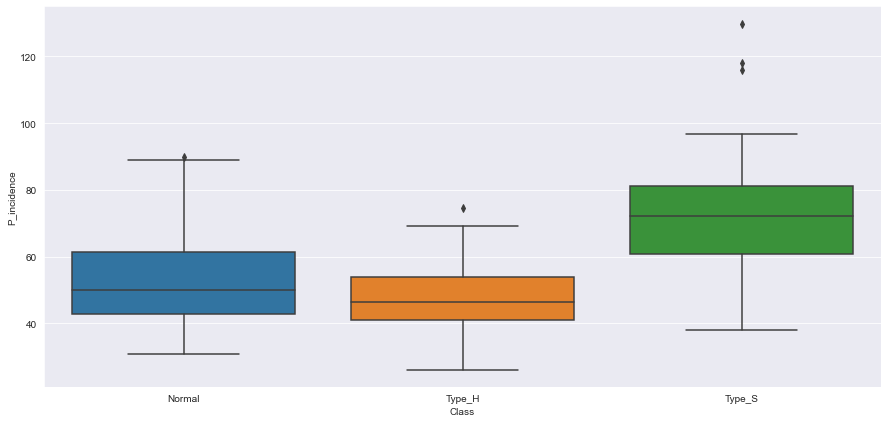

In [304]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class',y='P_incidence',data=df_merge)
plt.show()

#### Insights: from above figure it seems that P_incidence values are higher for Type_S and there are some outliers as well
#### Normal value is slightly higher then of type_H

#### P_tilt vs Class

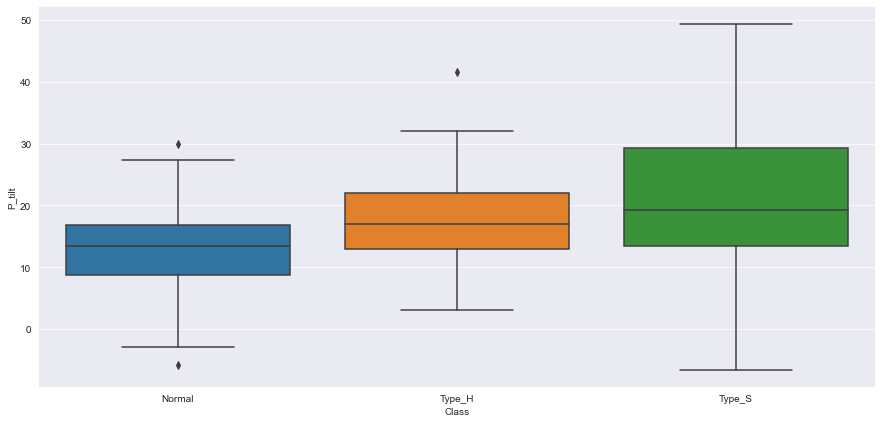

In [305]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class',y='P_tilt',data=df_merge)
plt.show()

#### Insights: Type_S has higher values among all and normal values are slightly less then type_H class , there are some outliers

#### Class vs L_angle

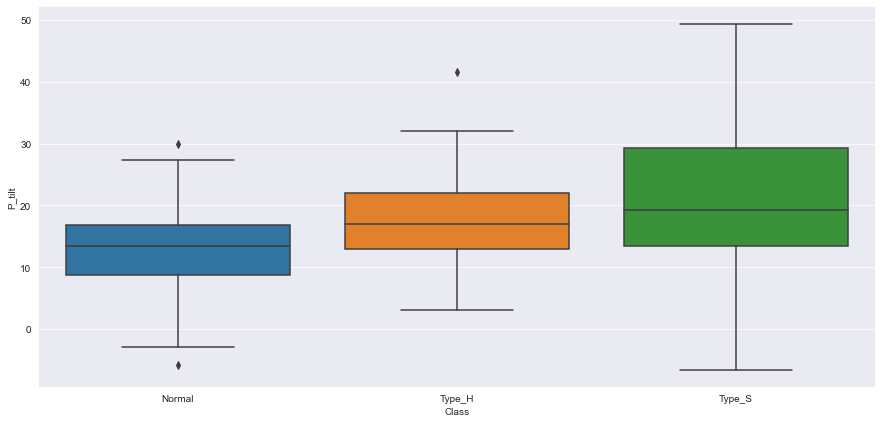

In [306]:

plt.figure(figsize=(15,7))
sns.boxplot(x='Class',y='P_tilt',data=df_merge)
plt.show()

#### Mean of type_S are higher then other classes for L_angle and for few cases there are outliers

#### SImilary we can create box plots for other attributes with Class attribute

In [307]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df_merge[c],25),np.percentile(df_merge[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df_merge[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df_merge.loc[(df_merge[c] >= lower) & (df_merge[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df_merge[c]=np.where(df_merge[c]>upper,mean,df_merge[c])
    df_merge[c]=np.where(df_merge[c]<lower,mean,df_merge[c])
    Outliers=[i for i in df_merge[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')


 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




In [308]:
df_merge['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

### 4.Model Building

### A Split data into X and Y

In [309]:
X=df_merge.drop(columns='Class')
y=df_merge['Class']

In [310]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.893743,16.548519,51.689825,42.697607,118.061242,22.193516
std,16.139975,8.404101,18.071145,12.656481,11.342178,25.230932
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705426,37.000000,33.347122,111.295804,1.603727
50%,58.691038,16.000000,49.562398,42.349084,118.000000,11.767934
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


In [311]:
y.describe()

count        310
unique         3
top       Type_S
freq         150
Name: Class, dtype: object

#### B. Split data into train and test with 80:20 proportion. [1 Marks]

In [312]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [313]:
X_train

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
267,72.343594,16.420790,59.869012,55.922805,118.000000,12.072644
290,43.718262,9.811985,52.000000,33.906277,118.000000,40.880923
209,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987
92,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067
194,94.174822,15.380770,67.705721,78.794052,114.890113,53.255220
...,...,...,...,...,...,...
156,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277
123,45.540790,13.069598,30.298321,32.471192,117.980830,-4.987130
15,59.726140,7.724873,55.343485,52.001268,125.174221,3.235159
125,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205


In [314]:
X_test

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
131,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832
294,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247
188,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575
229,77.236898,16.737622,49.775534,60.499275,110.690377,39.787154
240,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211
...,...,...,...,...,...,...
36,46.637864,15.853717,40.000000,30.784147,119.377603,9.064582
10,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129
80,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717
64,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018


#### C. Train a Supervised Learning Classification base model using KNN classifier

In [315]:
KNN = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [316]:
KNN.fit(X_train,y_train)
predicted_labels = KNN.predict(X_test)

#### D. Print all the possible performance metrics for both train and test data

In [317]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9153225806451613
Accuracy on Test data: 0.7096774193548387


#### Insights: Training accuracy is higher 0.91 but test accuracy is less 0.7 ,Performance is less in test data.
#### this is due to overfitting of data

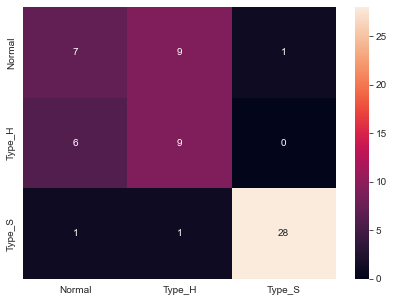

In [318]:
cm = confusion_matrix(y_test, predicted_labels, labels=["Normal","Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

#### Our model predicts Type_S correctly most of the time.Only 1 misclassification for this class


### Classification Report

In [319]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.50      0.41      0.45        17
      Type_H       0.47      0.60      0.53        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.71        62
   macro avg       0.65      0.65      0.64        62
weighted avg       0.72      0.71      0.71        62



#### Precision for Normal class: It tells,out of all predicted normal class what fraction are predicted correctly
    
#### Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly

#### class Normal predicted correctly for 53% of time. similary for class Type_H 45% and class Type_S 100%

#### By F1 score we can say that precison and recall is balanced for class Normal by 50% and for class Type_H by 51%

#### We have maximum F1 score for class Type_S

### Performance Improvement 

#### A Experiment with various parameters to improve performance of the base model

In [320]:
#### Finding best K value 
train_score=[]
test_score=[]
for i in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    KNN.fit(X_train,y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test,y_test))


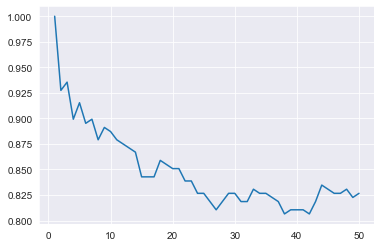

In [321]:
plt.plot(range(1,51),train_score)
plt.show()

#### Here training accuracy decreases with K values increases

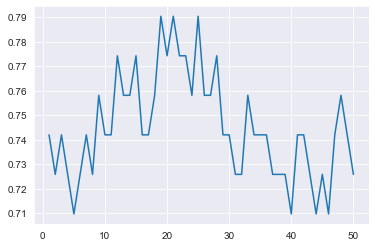

In [322]:
plt.plot(range(1,51),test_score)
plt.show()

#### here test accuracy is maximum when K is somewhere between 10 and 15 , which means if we put K=13 we can get better result

In [323]:
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    KNN.fit(X_train,y_train)
    predicted_labels = KNN.predict(X_test)
    print("Training accuracy for K {} is {}".format(i,KNN.score(X_train, y_train)))
    print("Testing accuracy for k{} is {}".format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Training accuracy for K 1 is 1.0
Testing accuracy for k1 is 0.7419354838709677
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

Training accuracy for K 3 is 0.9354838709677419
Testing accuracy for k3 is 0.7419354838709677
classification  Matrix:
               precision    recall  f1-score   support

      Normal       0.57      0.47      0.52        17
      Type_H       0.53      0.67      0.59        15
      Type_S       0.97      0.93      0.95        30

    accuracy                           0.74        62
   macro avg       0.69      0.69      0.68        62
weighted avg       0.75      0.74      0.74        62

Training accura

### C. Clearly state which parameters contributed most to improve model performance.

#### All the variables has significant effect on target class
#### class belongs to type_s has higher mean value for alomst all variables
#### Class belongs to normal has lower values for all variables
#### For almost all variables the distribution is normal
#### For Knn, k=19 we are getting balanced train and test error
#### We can use KNN as a final model because of balanced train and test error also the recall and precision values are good
#### Clear description on each variables may help to understand problem statement better because of medical domain

#### DOMAIN: Banking, Marketing
• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.
• DATA DICTIONARY:
1. Team: Team’s name
2. ID: Customer ID
3. Age: Customer’s approximate age.
4. CustomerSince: Customer of the bank since. [unit is masked]
5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6. ZipCode: Customer’s zip code.
7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9. Level: A level associated to the customer which is masked by the bank as an IP.
10. Mortgage: Customer’s mortgage. [unit is masked]
11. Security: Customer’s security asset with the bank. [unit is masked]
12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
13. InternetBanking: if the customer uses internet banking.
14. CreditCard: if the customer uses bank’s credit card.
15. LoanOnCard: if the customer has a loan on credit card.
• PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.


### 1. Data Understanding and Preparation:

#### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [324]:
df1 = pd.read_csv('Data1.csv')


In [325]:
df2 = pd.read_csv('Data2.csv')

#### B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

In [326]:
df1.shape

(5000, 8)

In [327]:
df2.shape

(5000, 7)

In [328]:
df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [329]:
df2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

#### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [330]:
df = pd.merge(df1, df2, how='inner', on = 'ID')

#### D. Change Datatype of below features to ‘Object’ [1 Marks]
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [332]:
convert_dict = {'CreditCard': object,
                'InternetBanking': object,
                'FixedDepositAccount':object,
                'Security':object,
                'Level':object,
                'HiddenScore':object
                }
df = df.astype(convert_dict)
print(df.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


### 2. Data Exploration and Analysis:

### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [333]:
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000


In [334]:
df.isnull()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [335]:
#### here for column LoanOnCard there are few null values 
df['LoanOnCard'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64>

In [336]:
#### we need to repalce NaN value with 0.0
df['LoanOnCard'] = df['LoanOnCard'].fillna(0.0)

In [337]:
df['LoanOnCard'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64>

In [338]:
df.isnull()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [339]:
df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [340]:
#### ID column is not useful in data visualization so we can drop this
df.drop('ID',axis=1,inplace=True)

In [341]:
df.describe()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800,0.096000
std,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802,0.294621
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000


#### LoanOnCard

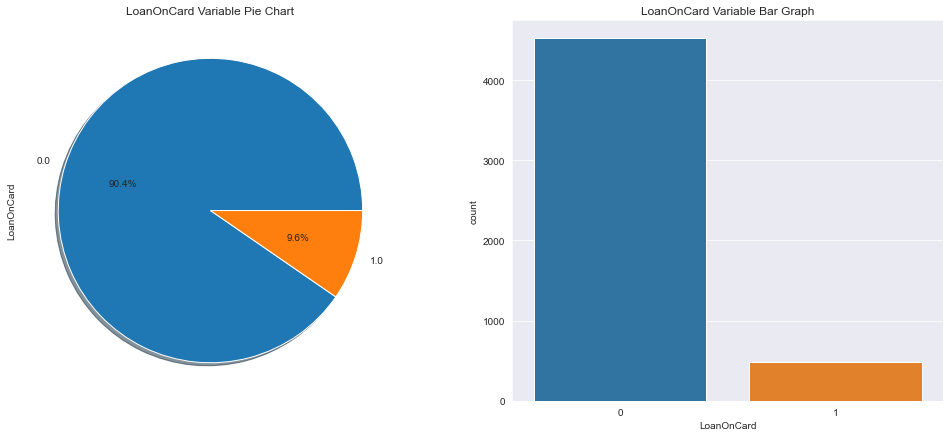

In [342]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

### from visualization , it seems around 90 % of people does not take loan on credit card

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

#### Bivariate Analysis of LoanOnCard 

#### LoanonCard vs CustomerSince

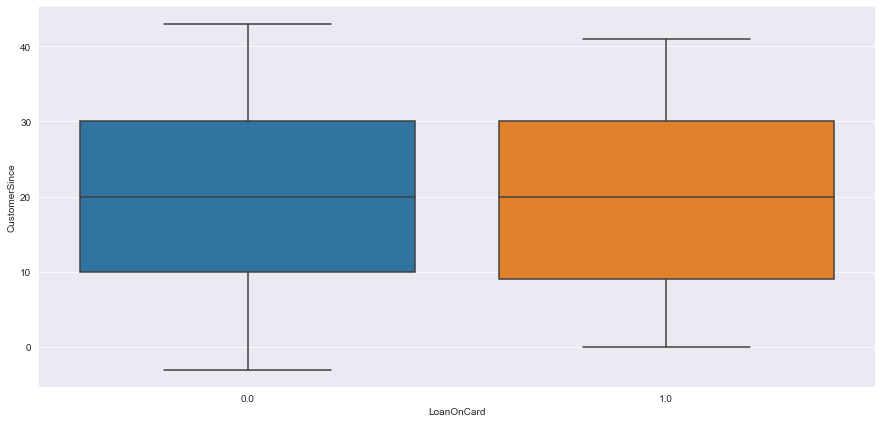

In [343]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= df)
plt.show()

#### Customer of the bank since has equal distribution on loan holders and non-loan holders.

#### LoanonCard vs Age

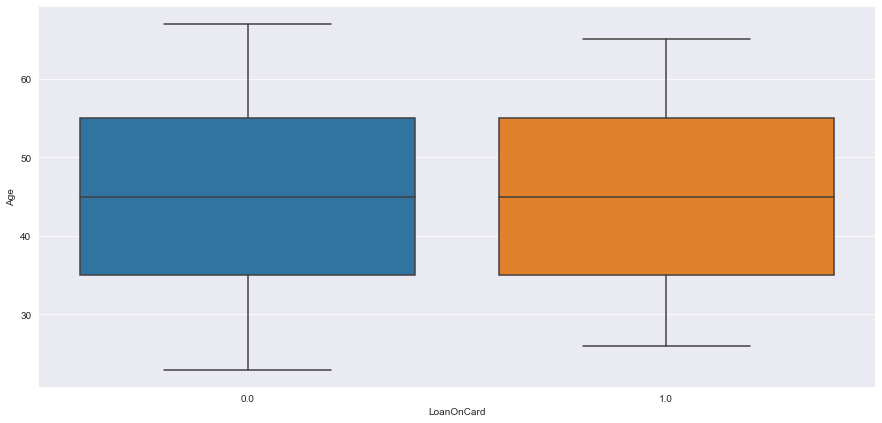

In [344]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= df)
plt.show()

#### Age distribution is nearly equal for both loan holders and non-loan holders

#### LoanonCard vs HighestSpend

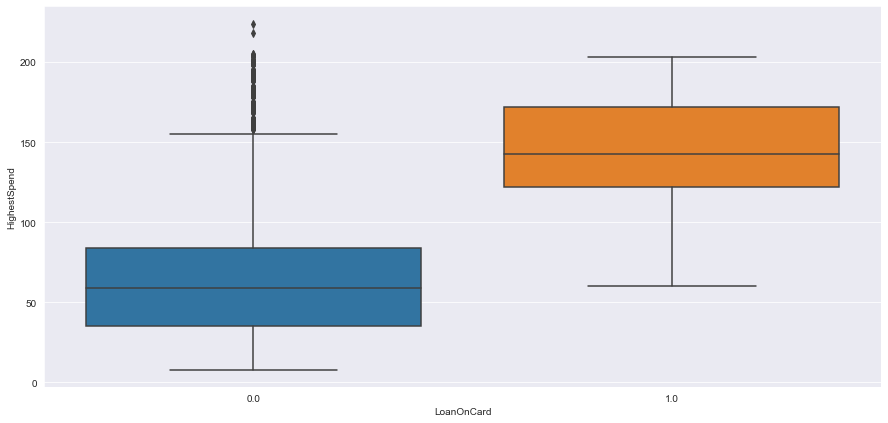

In [345]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= df)
plt.show()

#### people who spent higher amount are more then that which has spend, we can see there are some ouliers also those who did not take loan on card
#### Mean of Highestspend taking loanonCard is greater then that who did not take loanonCArd

#### Mortgage vs LoanOnCard

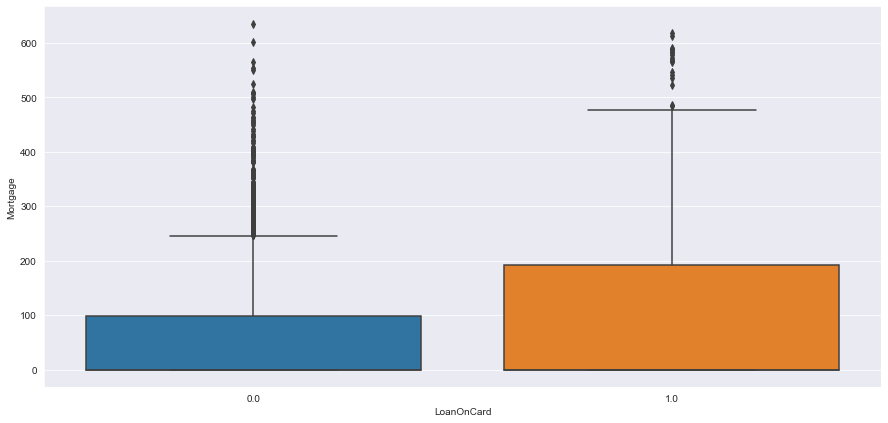

In [346]:
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= df)
plt.show()

#### Mortage of people who take loanonCard is higher then those who did not take loan, there are extreme ouliers in both the cases

### Check for unexpected values in each categorical variable and impute with best suitable value.

In [347]:
df

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


#### We can see credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building model

In [348]:
df.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

In [349]:
df

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0.0


#### We can see Age,Customer since and zip code does not have effect on target variable. So dropping this column before building model

In [350]:
df.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

In [351]:
df

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
0,49,4,1.6,1,0,0,0.0
1,34,3,1.5,1,0,0,0.0
2,11,1,1.0,1,0,0,0.0
3,100,1,2.7,2,0,0,0.0
4,45,4,1.0,2,0,0,0.0
...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0.0
4996,15,4,0.4,1,85,0,0.0
4997,24,2,0.3,3,0,0,0.0
4998,49,3,0.5,2,0,0,0.0


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HighestSpend         5000 non-null   int64  
 1   HiddenScore          5000 non-null   object 
 2   MonthlyAverageSpend  5000 non-null   float64
 3   Level                5000 non-null   object 
 4   Mortgage             5000 non-null   int64  
 5   FixedDepositAccount  5000 non-null   object 
 6   LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 312.5+ KB


In [353]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [354]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




## 3.Data Preparation and model building

### A. Split data into X and Y

In [355]:
X=df.drop(columns='LoanOnCard')
y=df['LoanOnCard'] #target

In [356]:
X

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount
0,49,4,1.6,1,0,0
1,34,3,1.5,1,0,0
2,11,1,1.0,1,0,0
3,100,1,2.7,2,0,0
4,45,4,1.0,2,0,0
...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0
4996,15,4,0.4,1,85,0
4997,24,2,0.3,3,0,0
4998,49,3,0.5,2,0,0


### B. Split data into train and test. Keep 25% data reserved for testing.

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### C. Train a Supervised Learning Classification base model - Logistic Regression

In [358]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

print('Accuracy on Training data:',log.score(X_train, y_train) )
print('Accuracy on Test data:',log.score(X_test, y_test) )

Accuracy on Training data: 0.9469333333333333
Accuracy on Test data: 0.9456


#### 94% accuracy on training set and 94% accuracy on test set.

Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

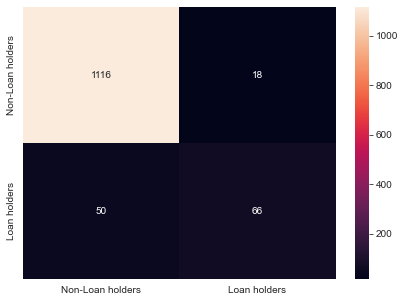

In [359]:
cm = confusion_matrix(y_test, log_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

### D. Print evaluation metrics for the model and clearly share insights.

In [360]:
print("classification  Matrix:\n",classification_report(y_test,log_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1134
         1.0       0.79      0.57      0.66       116

    accuracy                           0.95      1250
   macro avg       0.87      0.78      0.82      1250
weighted avg       0.94      0.95      0.94      1250



#### Here you can see this model is poor in predicting class 1 compared to class 0

#### Accuracy is good but in this case we need to look on recall value

#### Here Recall tells that only 57% class 1 is predicted correctly from actual values

#### We dont have enough sample of class 1 to train the model.

#### We will do the sampling and check how recall values improves in this case.

In [361]:
y.value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

### E. Balance the data using the right balancing technique.

1. Check distribution of the target variable

In [362]:
y.value_counts(normalize='true')

0.0    0.904
1.0    0.096
Name: LoanOnCard, dtype: float64

In [363]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

#### After sampling

In [364]:
y_s.value_counts(normalize='true')

0.0    0.5
1.0    0.5
Name: LoanOnCard, dtype: float64

### F. Again train the same previous model on balanced data.

In [365]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [366]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8803834808259587
Accuracy on Test data: 0.8787610619469026


#### Here both accuracy is reduced after sampling. Let us check on the classification report.

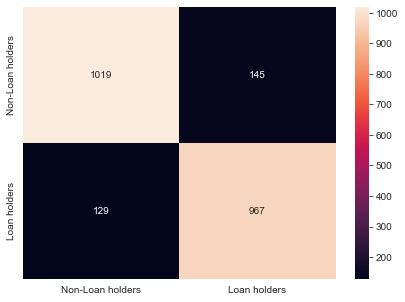

In [367]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

### G. Print evaluation metrics and clearly share differences observed.

In [368]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1164
         1.0       0.87      0.88      0.88      1096

    accuracy                           0.88      2260
   macro avg       0.88      0.88      0.88      2260
weighted avg       0.88      0.88      0.88      2260



#### Now we can see recall value is improved after sampling.

#### So whenever we have imbalance target we will use sampling method to balance the data.

#### If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.

## 4. Performance Improvement:

### A. Train a base model each for SVM, KNN.

In [369]:
KNN = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
KNN.fit(X_train,y_train)
predicted_labels = KNN.predict(X_test)
print("Training accuracy for K=13",KNN.score(X_train, y_train))
print("Testing accuracy for K=13",KNN.score(X_test, y_test))
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Training accuracy for K=13 0.932448377581121
Testing accuracy for K=13 0.9141592920353983
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91      1164
         1.0       0.89      0.94      0.91      1096

    accuracy                           0.91      2260
   macro avg       0.91      0.91      0.91      2260
weighted avg       0.92      0.91      0.91      2260



In [370]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[949 215]
 [147 949]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1164
         1.0       0.82      0.87      0.84      1096

    accuracy                           0.84      2260
   macro avg       0.84      0.84      0.84      2260
weighted avg       0.84      0.84      0.84      2260



#### Here we can see that KNN Model has better recall for both the classes as well as accuracy is also higher

### B. Tune parameters for each of the models wherever required and finalize a model.

In [371]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_model = svm.SVC(kernel='rbf') # gausian Kernel


LR: 0.946000 (0.007211)
KNN: 0.925400 (0.008002)
SVM: 0.906800 (0.012781)


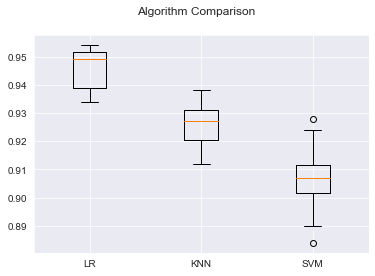

In [372]:
from sklearn import model_selection
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM',svm_model))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Without doing any sampling using k-fold we are getiing good accuracy score in logistic regresssion.
#### we can see LR accuracy is higher then SVM and KNN has the least accuracy for this model
#### As we are having imbalanced data we will use stratified k-fold to check the performance.

LR: 0.946200 (0.005896)
KNN: 0.925000 (0.004837)
SVM: 0.906200 (0.004142)


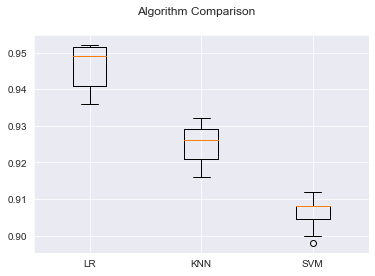

In [373]:
#seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVM',svm_model))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### After sampling the data SVM accuracy becomes lesss then KNN and we can see the improvement in accuracy

### C. Print evaluation metrics for final model.

In [374]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))
print("confusion Matrix:\n",confusion_matrix(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1164
         1.0       0.87      0.88      0.88      1096

    accuracy                           0.88      2260
   macro avg       0.88      0.88      0.88      2260
weighted avg       0.88      0.88      0.88      2260

confusion Matrix:
 [[1019  145]
 [ 129  967]]


### D Share improvement achieved from base model to final model.

##### We are selecting final model as logistic regression as it performs well in training and testing test.

##### Logistic Regression is not affected by overfitting and it is also has good recall value.

##### Logistic regression performed well in k-fold cross validation as well.

##### Deviation also less in logistic regression.

##### Sampling improved to predict minority classes as well

##### Suggesting to collect data equally for both the classes.

##### Few customers does't have credit card but those customer having loan on card. This data error can be avoided